In [ ]:
#########################################################################
############------- Machine Learning Inmersion ------------######################
#########################################################################
# Capacitador: André Omar Chávez Panduro
# email: andrecp38@gmail.com / andre.chavez@urp.edu.pe
# Sesion05 : Ensamble - Boosting de Algoritmos de Machine Learning - BalanceoDatos
# version: 1.0
#########################################################################

In [1]:
! pip install --user imblearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

![image.png](attachment:image.png)

In [ ]:
##################################################
## Desarrollo de Modelos de Machine Learning
##################################################

In [ ]:
## Leemos las librerias necesarias para poder trabajar

In [ ]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
import warnings
warnings.filterwarnings("ignore")
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python

In [ ]:
## Leemos los datos o el dataset a trabajar

In [ ]:
# Leemos la data de desarrollo de modeolos
desarrll = pd.read_csv("C:/Users/Andre Chavez/Desktop/Data/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [ ]:
desarrll.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Dimension
desarrll.shape
# Son 614 obs con 13 columnas

(614, 13)

In [ ]:
#Leer los primeros registros.
# Podemos ver la estructura de los datos, es el str de Python
desarrll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [ ]:
## Analisis Exploratorio de los datos

![image.png](attachment:image.png)

In [ ]:
#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [ ]:
desarrll.describe() #Resumen de la información cuantitativa

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

In [ ]:
## Aquí hay algunas conclusiones importantes

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [ ]:
# Tabla Resumen
desarrll.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002804,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

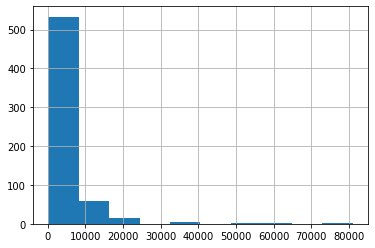

In [ ]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
desarrll['ApplicantIncome'].hist()


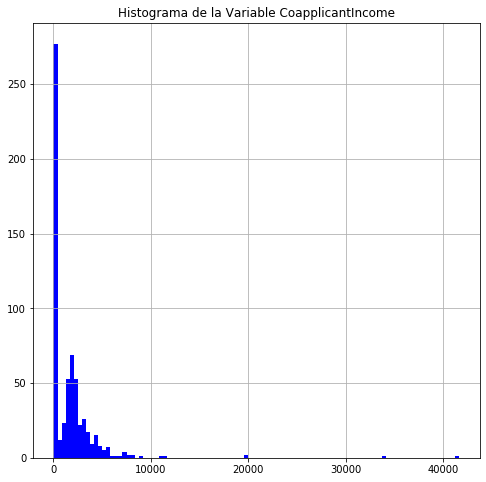

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
desarrll['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

In [ ]:
## Cuartiles y diagramas de cajas


Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



![image.png](attachment:image.png)

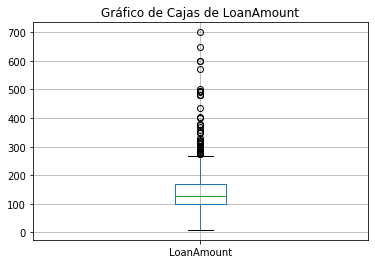

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de LoanAmount')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
desarrll.boxplot(column='LoanAmount')

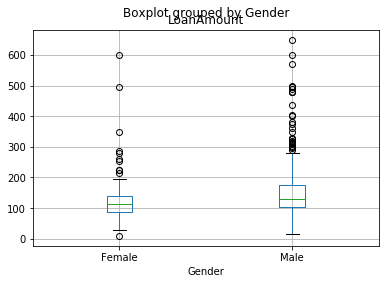

In [ ]:
desarrll.boxplot('LoanAmount',by='Gender')

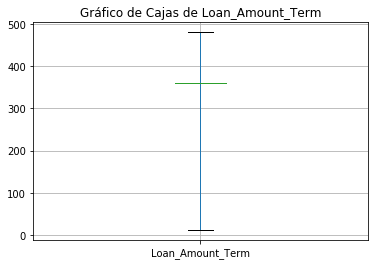

In [ ]:
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de Loan_Amount_Term')
desarrll.boxplot(column='Loan_Amount_Term',autorange='T',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

In [ ]:
## Imputacion de Datos 

In [ ]:
# Revisar los valores perdidos
desarrll.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
########################################
# Tratamiento de valores missings
########################################

![image.png](attachment:image.png)

In [ ]:
# No olvidemos separar las variables cualitativas para poder trabajarlas eficientemente
columnas_categoricas = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents","Loan_Status"]

In [ ]:
# Separamos las columnas numericas
columnas_numericas = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [ ]:
# Visualizamos los valores perdidos respecto a las variables cualititativas
desarrll.Dependents.value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [ ]:
desarrll.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Imputamos los valores cualitativos por Moda
desarrll.Gender = desarrll.Gender.fillna("Male")
desarrll.Married = desarrll.Married.fillna("Yes")
desarrll.Self_Employed = desarrll.Self_Employed.fillna("Yes")
desarrll.Credit_History = desarrll.Credit_History.fillna("1")
desarrll.Dependents = desarrll.Dependents.fillna("0")

In [ ]:
desarrll.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [ ]:
# Preprocesamiento con LabelEncoder

from sklearn.preprocessing import LabelEncoder
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(desarrll[str(c)])
    desarrll[str(c)]=le.transform(desarrll[str(c)]) 

Gender
Married
Education
Self_Employed
Property_Area
Dependents
Loan_Status


In [ ]:
desarrll.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1,1,0


In [ ]:
#desarrll.isnull().sum()

In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
## Median
for c in columnas_numericas:
    median = desarrll[c].median()
    desarrll[c].fillna(median, inplace=True)

In [ ]:
#desarrll.LoanAmount = desarrll.LoanAmount.fillna(desarrll.LoanAmount.median())

In [ ]:
# Revisamos si la recodigicación fue la idónea
desarrll.isnull().sum()
#train.head(10)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
########################################
# Tratamiento de valores outliers
########################################

![image.png](attachment:image.png)

In [ ]:
# Creamos una funcion para poder visualizar los percentiles
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Cuantil"]
    return(matrix)

In [ ]:
# Analizamos las variables numericas
# Variable
Cuantiles(desarrll["ApplicantIncome"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.00,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.0,97.500,99.00,100.0
Valor_Cuantil,150.0,1025.0,1897.55,2216.1,2605.4,3050.4,3406.8,3812.5,4343.6,5185.6,6252.4,9459.9,10752.075,14583.0,17948.875,32540.41,81000.0


In [ ]:
# Tratamiento para la variable ApplicantIncome

In [ ]:
## ApplicantIncome
cuantil_1 = np.percentile(desarrll["ApplicantIncome"],1)
cuantil_95 = np.percentile(desarrll["ApplicantIncome"],95)

# Reemplazamos el valor minimo y maximo
desarrll.loc[desarrll["ApplicantIncome"]<cuantil_1,"ApplicantIncome"] = cuantil_1
desarrll.loc[desarrll["ApplicantIncome"]>cuantil_95,"ApplicantIncome"] = cuantil_95


In [ ]:
# Analizamos las variables numericas
# Variable
Cuantiles(desarrll["CoapplicantIncome"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.0,97.500,99.00,100.0
Valor_Cuantil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1188.5,1689.6,2083.0,2535.0,3782.2,4300.025,4997.4,6666.675,8895.89,41667.0


In [ ]:
## CoapplicantIncome
cuantil_99 = np.percentile(desarrll["CoapplicantIncome"],99)
# Reemplazamos el valor maximo
desarrll.loc[desarrll["CoapplicantIncome"]>cuantil_99,"CoapplicantIncome"] = cuantil_99

In [ ]:
# Analizamos las variables numericas
# Variable LoanAmount
Cuantiles(desarrll["LoanAmount"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.00,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.500,95.0,97.5,99.00,100.0
Valor_Cuantil,9.0,30.65,57.3,72.3,96.0,109.9,119.2,128.0,136.0,155.0,180.0,229.4,258.025,293.4,378.7,495.87,700.0


In [ ]:
## CoapplicantIncome
cuantil_1 = np.percentile(desarrll["LoanAmount"],1)
# Reemplazamos el valor minimo
desarrll.loc[desarrll["LoanAmount"]<cuantil_1,"LoanAmount"] = cuantil_1

In [ ]:
# Analizamos las variables numericas
# Variable Loan_Amount_Term
Cuantiles(desarrll["Loan_Amount_Term"]).transpose()
# Nos hacemos la pregunta, podríamos acotar la variable?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Cuantil,12.0,84.0,180.0,300.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,480.0,480.0


In [ ]:
########################################
## Feature Enginnering ##
########################################

![image.png](attachment:image.png)

In [ ]:
## Creación de Variables por Decision de Negocio o de acuerdo a metodologías más automatizadas es el
# corazon de Machine Learning
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de scoreo o data productiva.

In [ ]:
desarrll.shape

(614, 13)

In [ ]:
desarrll.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1,2,1


In [ ]:
# Ingenieria de datos
#Creamos las variables para el entrenamiento o train
desarrll['TotalIncome']    = desarrll['ApplicantIncome'] + desarrll['CoapplicantIncome']
desarrll['Log_LoanAmount'] = round(np.log(desarrll['LoanAmount']+1),2)

In [ ]:
desarrll['AmountxTerm']    = round(desarrll['LoanAmount']/desarrll['Loan_Amount_Term'],2)
desarrll["Cuota_Ingreso1"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["ApplicantIncome"])
desarrll["Cuota_Ingreso2"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["TotalIncome"])
desarrll["Cuota_Ingreso_Hijo"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["TotalIncome"]/(desarrll["Dependents"]+1))


In [ ]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
desarrll.shape

(614, 19)

In [ ]:
desarrll.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1,2,1,5849.0,4.86,0.36,0.060789,0.060789,0.060789
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1,0,0,6091.0,4.86,0.36,0.077581,0.058374,0.116748


In [ ]:
########################################
# Particion Muestral de los datos
########################################

![image.png](attachment:image.png)

In [ ]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
desarrll = desarrll.drop('Loan_ID', axis=1) # Axis=1
desarrll.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1,2,1,5849.0,4.86,0.36,0.060789,0.060789,0.060789
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1,0,0,6091.0,4.86,0.36,0.077581,0.058374,0.116748


In [ ]:
#desarrll.head(2)

In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(desarrll.drop('Loan_Status', axis=1), 
                                                    desarrll['Loan_Status'], 
                                                    test_size=0.30,
                                                    stratify=desarrll['Loan_Status'],
                                                    random_state=100)

In [ ]:
desarrll.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
########################################
# Selección de Variables
########################################

![image.png](attachment:image.png)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
desarrll.shape # Eliminamos el ID

(614, 18)

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo

forest = RandomForestClassifier()   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train)        # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_ # Variables importantes




In [ ]:
importances

array([0.00831732, 0.00960426, 0.02273468, 0.01636904, 0.01542394,
       0.06317477, 0.04871003, 0.08275988, 0.011834  , 0.23309589,
       0.0318901 , 0.0891604 , 0.05310216, 0.04314928, 0.10819583,
       0.07853924, 0.08393917])

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,Credit_History,0.233096
1,Cuota_Ingreso1,0.108196
2,TotalIncome,0.089160
3,Cuota_Ingreso_Hijo,0.083939
4,LoanAmount,0.082760
5,Cuota_Ingreso2,0.078539
6,ApplicantIncome,0.063175
7,Log_LoanAmount,0.053102
8,CoapplicantIncome,0.048710
9,AmountxTerm,0.043149


In [ ]:
# Instalamos Boruta
! pip install Boruta

In [ ]:
# Seleccion Boruta (Permutaciones de arboles)
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rfc = RandomForestClassifier()
boruta_selector = BorutaPy(rfc, n_estimators='auto',verbose=2)

x=X_train.values
y=y_train.values

boruta_selector.fit(x,y)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	13
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	13
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	13
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	13
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	3
Rejected: 	13
I

In [ ]:
# Observamos cual de las variables el algoritmo eligio
X_train_Bor = X_train.columns[boruta_selector.support_]

In [ ]:
X_train_Bor

Index(['Credit_History', 'TotalIncome'], dtype='object')

In [ ]:
# Si deseamos , podemos elegir las variables mas importantes
X_train_subset =X_train[["Credit_History","Cuota_Ingreso1","Cuota_Ingreso_Hijo","LoanAmount"]]

In [ ]:
X_train_subset.head(3)

,Credit_History,Cuota_Ingreso1,Cuota_Ingreso_Hijo,LoanAmount
544,1,0.093912,0.076993,102.0
13,1,0.170894,0.067476,114.0
383,1,0.049610,0.049610,128.0


In [ ]:
########################################
# Balanceo de Datos
########################################

![image.png](attachment:image.png)

In [ ]:
# Datos Entrenamiento : X_train, y_train

In [ ]:
# RandomUnderSampling
#! pip install imblearn

In [ ]:
# Importar la librería de balnacear datos, si no está hacer por el CMD de Python,
# la sentencia es : pip install imblearn desde el terminal de Conda
import imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True) # Define o instancian
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)   # Ejecuto

In [ ]:
df_X_rus = pd.DataFrame(data=X_rus,columns=X_train.columns)
df_y_rus = pd.DataFrame(data=y_rus,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_rus = pd.concat([df_X_rus, df_y_rus], axis=1)

In [ ]:
df_balanceado_rus.Loan_Status.value_counts()

1    134
0    134
Name: Loan_Status, dtype: int64

In [ ]:
# RandomOverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()            # Define o instancian
X_ros, y_ros = ros.fit_sample(X_train, y_train)  # Ejecuto

df_X_ros = pd.DataFrame(data=X_ros,columns=X_train.columns)
df_y_ros = pd.DataFrame(data=y_ros,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_ros = pd.concat([df_X_ros, df_y_ros], axis=1)

In [ ]:
df_balanceado_ros.Loan_Status.value_counts()

1    295
0    295
Name: Loan_Status, dtype: int64

In [ ]:
#  Balenceo de Datos TomekLink

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority') # Instancia o defines
X_tl, y_tl,id_tl  = tl.fit_sample(X_train, y_train)                # Aplicar

df_X_tl = pd.DataFrame(data=X_tl,columns=X_train.columns)
df_y_tl = pd.DataFrame(data=y_tl,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

In [ ]:
df_balanceado_tl.Loan_Status.value_counts()

1    243
0    134
Name: Loan_Status, dtype: int64

In [ ]:
#  Balenceo de Datos ClusterCentroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 200})        # Instancio
X_cc, y_cc = cc.fit_sample(X_train, y_train) # Ajusto

df_X_cc = pd.DataFrame(data=X_cc,columns=X_train.columns)
df_y_cc = pd.DataFrame(data=y_cc,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_cc = pd.concat([df_X_cc, df_y_cc], axis=1)

In [ ]:
df_balanceado_cc.Loan_Status.value_counts()

1    200
0    134
Name: Loan_Status, dtype: int64

In [ ]:
#  Smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

df_X_sm = pd.DataFrame(data=X_sm,columns=X_train.columns)
df_y_sm = pd.DataFrame(data=y_sm,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [ ]:
df_balanceado_sm.Loan_Status.value_counts()

1    295
0    295
Name: Loan_Status, dtype: int64

In [ ]:
#  SmoteTomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

df_X_smt = pd.DataFrame(data=X_smt,columns=X_train.columns)
df_y_smt = pd.DataFrame(data=y_smt,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [ ]:
df_balanceado_smt.Loan_Status.value_counts()

1    244
0    244
Name: Loan_Status, dtype: int64

In [ ]:
########################################
# Modelamiento de los datos
########################################

![image.png](attachment:image.png)

In [ ]:
## Modelos Supervisados : Arbol CART ##

In [ ]:
# Paso N°01: Llamar un algoritmo predictivos
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
cart = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3,
                              max_features="sqrt")

cart.fit(X_train, y_train) # Entrenamos el algoritmo

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=cart.predict(X_train) # Prediccion sobre el train
y_pred_test= cart.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 21 113]
 [  7 288]]
Matriz confusion: Test
[[  7  51]
 [  9 118]]
Accuracy: Train
0.7202797202797203
Accuracy: Test
0.6756756756756757
Precision: Train
0.7182044887780549
Precision: Test
0.6982248520710059
Recall: Train
0.976271186440678
Recall: Test
0.9291338582677166


In [ ]:
## Modelos Supervisados : Random Forest ##

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# Parámetros  :
# max_features : None ,'sqrt',%X
# n_estimators  : Número de árboles a utilizar
# min_sample_leaf : Tamaño mínimo de elementos en hojas terminales (Nodos hijos)
# random_state : Semilla aleatoria
# oob_score : Error fuera de bolsa
#rf = RandomForestClassifier(max_features=4 , n_estimators=200,oob_score=True,max_depth=2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train) # Entrenando un algoritmo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=rf.predict(X_train) # Prediccion sobre el train
y_pred_test= rf.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[129   5]
 [  3 292]]
Matriz confusion: Test
[[ 30  28]
 [ 15 112]]
Accuracy: Train
0.9813519813519813
Accuracy: Test
0.7675675675675676
Precision: Train
0.9831649831649831
Precision: Test
0.8
Recall: Train
0.9898305084745763
Recall: Test
0.8818897637795275


In [ ]:
## Modelos Supervisados : AdaBoost ##

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Paso01: Instancio
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier(learning_rate=0.9, n_estimators=10000) # Paso02: Especifico
AdaBoost.fit(X_train, y_train) # Paso03: Entrenamiento algoritmo

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.9,
                   n_estimators=10000, random_state=None)

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=AdaBoost.predict(X_train) # Prediccion sobre el train
y_pred_test= AdaBoost.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[134   0]
 [  0 295]]
Matriz confusion: Test
[[ 29  29]
 [ 24 103]]
Accuracy: Train
1.0
Accuracy: Test
0.7135135135135136
Precision: Train
1.0
Precision: Test
0.7803030303030303
Recall: Train
1.0
Recall: Test
0.8110236220472441


In [ ]:
## Modelos Supervisados : GBM ##

In [ ]:
from sklearn import ensemble
params = {'n_estimators': 500,  # Numero de arboles o estimadores
          'max_depth': 3,       # Profundidad maxima de cada arbol
          'subsample': 0.60,    # Proporcion de obs,40% al 60%
          'learning_rate': 0.01, # Peso de cada arbol o clasificador en la decision
          'min_samples_leaf': 30, 
          'random_state': 3}
gbm = ensemble.GradientBoostingClassifier(**params)
gbm.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=3, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=gbm.predict(X_train) # Prediccion sobre el train
y_pred_test= gbm.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 66  68]
 [  7 288]]
Matriz confusion: Test
[[ 23  35]
 [  1 126]]
Accuracy: Train
0.8251748251748252
Accuracy: Test
0.8054054054054054
Precision: Train
0.8089887640449438
Precision: Test
0.782608695652174
Recall: Train
0.976271186440678
Recall: Test
0.9921259842519685


In [ ]:
# Instalacion
! pip install xgboost

In [ ]:
## Modelos Supervisados : XGBoost ##
X_train.Credit_History = X_train.Credit_History.astype(int)
X_test.Credit_History  = X_test.Credit_History.astype(int)

In [ ]:
# Paso1: Definir la matriz XGB
import xgboost as xgb
# PasoN01: Configuramos los datasets
dtrain =  xgb.DMatrix(data=X_train, label = y_train)
dtest   = xgb.DMatrix(data=X_test,   label = y_test)

In [ ]:
# PasoN02: Configurar parametros
xgb_params = {
    "objective": "reg:logistic",
    "eta": 0.005,
    "max_depth": 2,
    "early_stopping_rounds":  50,
    "gamma": 0.1,
    "eval_metric": "auc",
    "print_every_n": 50
}

num_rounds = 250


# PasoN03: 
watch_list  = [(dtrain,'train'),(dtest,'test')] # Hacen un lostado de los datos
xgb_fit = xgb.train(xgb_params, dtrain, num_rounds, watch_list) # Entrenamiento del algoritmo

[0]	train-auc:0.741462	test-auc:0.713006
[1]	train-auc:0.742601	test-auc:0.713006
[2]	train-auc:0.742601	test-auc:0.713006
[3]	train-auc:0.742601	test-auc:0.713006
[4]	train-auc:0.742601	test-auc:0.713006
[5]	train-auc:0.742601	test-auc:0.713006
[6]	train-auc:0.742601	test-auc:0.713006
[7]	train-auc:0.742601	test-auc:0.713006
[8]	train-auc:0.742601	test-auc:0.713006
[9]	train-auc:0.742601	test-auc:0.713006
[10]	train-auc:0.742601	test-auc:0.713006
[11]	train-auc:0.742601	test-auc:0.713006
[12]	train-auc:0.742601	test-auc:0.713006
[13]	train-auc:0.742601	test-auc:0.713006
[14]	train-auc:0.742601	test-auc:0.713006
[15]	train-auc:0.742601	test-auc:0.713006
[16]	train-auc:0.742601	test-auc:0.713006
[17]	train-auc:0.742601	test-auc:0.713006
[18]	train-auc:0.742601	test-auc:0.713006
[19]	train-auc:0.742601	test-auc:0.713006
[20]	train-auc:0.742601	test-auc:0.713006
[21]	train-auc:0.742601	test-auc:0.713006
[22]	train-auc:0.742601	test-auc:0.713006
[23]	train-auc:0.742601	test-auc:0.713006
[2

In [ ]:
frame = { 'Gain':        pd.Series(xgb_fit.get_score(importance_type='gain')), # Ganancia en prediccion por la variable
          'Cover':       pd.Series(xgb_fit.get_score(importance_type='cover')),# Profundidad del arbol 
          'Weight':      pd.Series(xgb_fit.get_score(importance_type='weight'))} # En cuanto arboles sale la variable

result = pd.DataFrame(frame) 
result 

,Gain,Cover,Weight
Credit_History,49.764361,100.198998,250
Cuota_Ingreso1,2.134070,40.226678,116
Cuota_Ingreso2,5.524917,87.527262,104
Cuota_Ingreso_Hijo,1.021567,14.931440,99
TotalIncome,4.843689,85.821554,91
AmountxTerm,1.025984,13.364035,78
Property_Area,3.624939,79.188017,12


In [ ]:
# Podemos calcular la importancia de variables por Xgboost
xgb.plot_importance(xgb_fit,importance_type='cover')

In [ ]:
# GridSearch de Parametros #
import xgboost as xgb

In [ ]:
# Definimos la funcion de GridSearch
from sklearn.model_selection import GridSearchCV       # Exhaustivo
from sklearn.model_selection import RandomizedSearchCV # Combina aleatoriamente
from scipy.stats import randint as sp_randint

In [ ]:
# Configuramos el subset de parametros a trabajar
cv_params = {'max_depth': [1,2,3,4,5,7],
            'subsample':[0.5,0.6,0.7,0.8],
             'n_estimators':[100,200,300],
            'learning_rate':[0.1,0.01,0.001,0.0001]}

In [ ]:
# Definimos un clasificador inicial, generalmente sin muchos parametros
xgboost_ini = xgb.XGBClassifier().fit(X_train, y_train)

In [ ]:
# Con el clasificador inicial, tratamos de buscar los mejores parametros
optimized_GBM = RandomizedSearchCV(xgboost_ini, cv_params, scoring = 'accuracy', cv = 5) 

In [ ]:
# Buscamos los parametros de acuerdo a nuestro criterio
optimized_GBM.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True,
                                           subsample=1),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distri

In [ ]:
# De acuerdo a la busqueda , nos quedamos con los mejores parametros 
print (optimized_GBM.best_params_)

{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.01}


In [ ]:
# Parametrizamos el Best Xgboost 

In [ ]:
# PasoN02: Configurar parametros
xgb_params = {
    "objective": "reg:logistic",
    "eta": 0.01,
    "max_depth": 1,
    "early_stopping_rounds":  50,
    "gamma": 0.1,
    "subsample":0.7,
    "eval_metric": "auc",
    "print_every_n": 50
}

num_rounds = 100
# PasoN03: 
watch_list  = [(dtrain,'train'),(dtest,'test')]
xgb_fit = xgb.train(xgb_params, dtrain, num_rounds, watch_list) # Entrenamiento del algoritmo

[0]	train-auc:0.70998	test-auc:0.694339
[1]	train-auc:0.70998	test-auc:0.694339
[2]	train-auc:0.70998	test-auc:0.694339
[3]	train-auc:0.70998	test-auc:0.694339
[4]	train-auc:0.70998	test-auc:0.694339
[5]	train-auc:0.70998	test-auc:0.694339
[6]	train-auc:0.70998	test-auc:0.694339
[7]	train-auc:0.70998	test-auc:0.694339
[8]	train-auc:0.70998	test-auc:0.694339
[9]	train-auc:0.70998	test-auc:0.694339
[10]	train-auc:0.70998	test-auc:0.694339
[11]	train-auc:0.70998	test-auc:0.694339
[12]	train-auc:0.70998	test-auc:0.694339
[13]	train-auc:0.70998	test-auc:0.694339
[14]	train-auc:0.70998	test-auc:0.694339
[15]	train-auc:0.70998	test-auc:0.694339
[16]	train-auc:0.70998	test-auc:0.694339
[17]	train-auc:0.70998	test-auc:0.694339
[18]	train-auc:0.70998	test-auc:0.694339
[19]	train-auc:0.70998	test-auc:0.694339
[20]	train-auc:0.70998	test-auc:0.694339
[21]	train-auc:0.70998	test-auc:0.694339
[22]	train-auc:0.70998	test-auc:0.694339
[23]	train-auc:0.70998	test-auc:0.694339
[24]	train-auc:0.70998	tes

In [ ]:
## Modelos Supervisados : LigtGBM ##

In [ ]:
#! pip install lightgbm
import lightgbm as lgb
dtrain = lgb.Dataset(X_train, label=y_train)
dtest =  lgb.Dataset(X_test,  label=y_test, reference=dtrain)

In [ ]:
params = {
        'task':'train', 
        'is_unbalance': False, 
        'max_dept':1,
        'max_bin': 10,  # max cantidad de cortes de una var. numerica
        'boosting_type': 'gbdt',
        'objective': 'binary',
            #'min_child_weight': 150,
            'metric': 'auc',
            #'min_data_in_leaf': 250,
            'num_leaves': 5,
            'learning_rate': 0.0001,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 10,
            #'min_data_per_group':150 ,
            'verbose': 1,
            'seed ':1234
    }

In [ ]:
gbm = lgb.train(params,
                dtrain,
                num_boost_round=10000,
                valid_sets=[dtrain,dtest],
                early_stopping_rounds=100)

[1]	training's auc: 0.771541	valid_1's auc: 0.797651
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.771541	valid_1's auc: 0.797651
[3]	training's auc: 0.778358	valid_1's auc: 0.79256
[4]	training's auc: 0.79002	valid_1's auc: 0.798534
[5]	training's auc: 0.796218	valid_1's auc: 0.799484
[6]	training's auc: 0.794017	valid_1's auc: 0.80057
[7]	training's auc: 0.793157	valid_1's auc: 0.805186
[8]	training's auc: 0.797129	valid_1's auc: 0.806951
[9]	training's auc: 0.798697	valid_1's auc: 0.809938
[10]	training's auc: 0.801214	valid_1's auc: 0.804575
[11]	training's auc: 0.811169	valid_1's auc: 0.812517
[12]	training's auc: 0.820124	valid_1's auc: 0.813196
[13]	training's auc: 0.819251	valid_1's auc: 0.819644
[14]	training's auc: 0.821983	valid_1's auc: 0.820595
[15]	training's auc: 0.824172	valid_1's auc: 0.821341
[16]	training's auc: 0.82493	valid_1's auc: 0.820866
[17]	training's auc: 0.825816	valid_1's auc: 0.823174
[18]	training's auc: 0.826752	va

In [ ]:
# Importancia de Variables
importancia=gbm.feature_importance(importance_type='gain')

def impxgb(valores,variables):
    dictimp={variables[a]:valores[a] for a in range(0,len(variables)) }
    xgimp=sorted(list(dictimp.items()), key=lambda x: x[1],reverse=True)

    return xgimp

ixg=impxgb(importancia,X_train.columns)
pd.Series(ixg)

0        (Credit_History, 1591.5394973754883)
1        (Cuota_Ingreso2, 101.66533041000366)
2         (Cuota_Ingreso1, 51.38326930999756)
3     (CoapplicantIncome, 38.578789949417114)
4               (Married, 35.753469705581665)
5       (ApplicantIncome, 22.287949919700623)
6           (TotalIncome, 17.533309817314148)
7         (Property_Area, 17.070509910583496)
8             (AmountxTerm, 15.2361501455307)
9             (Education, 10.756069898605347)
10            (LoanAmount, 8.152129888534546)
11      (Loan_Amount_Term, 6.183619976043701)
12     (Cuota_Ingreso_Hijo, 2.23334002494812)
13                              (Gender, 0.0)
14                          (Dependents, 0.0)
15                       (Self_Employed, 0.0)
16                      (Log_LoanAmount, 0.0)
dtype: object

In [ ]:
## Modelos Supervisados : CatBoost ##
#! pip install catboost
from catboost import CatBoostClassifier
# Definimos el clasificador
CatBoost=CatBoostClassifier(eval_metric="AUC",
                            one_hot_max_size=20,
                            depth=1, 
                            iterations= 800, 
                            l2_leaf_reg= 2, 
                            learning_rate= 0.0001)

In [ ]:
# Ajustamos un modelo de clasificación
Cat=CatBoost.fit(X_train,y_train)

0:	learn: 0.7099798	total: 57.9ms	remaining: 46.3s
1:	learn: 0.7099798	total: 61.8ms	remaining: 24.7s
2:	learn: 0.7099798	total: 65.4ms	remaining: 17.4s
3:	learn: 0.7099798	total: 69.2ms	remaining: 13.8s
4:	learn: 0.7099798	total: 72.8ms	remaining: 11.6s
5:	learn: 0.7099798	total: 76.2ms	remaining: 10.1s
6:	learn: 0.7099798	total: 79.6ms	remaining: 9.01s
7:	learn: 0.7099798	total: 82.9ms	remaining: 8.21s
8:	learn: 0.7099798	total: 86.2ms	remaining: 7.57s
9:	learn: 0.7099798	total: 89.4ms	remaining: 7.06s
10:	learn: 0.7099798	total: 92.6ms	remaining: 6.64s
11:	learn: 0.7099798	total: 95.8ms	remaining: 6.29s
12:	learn: 0.7099798	total: 99.1ms	remaining: 6s
13:	learn: 0.7099798	total: 102ms	remaining: 5.75s
14:	learn: 0.7099798	total: 106ms	remaining: 5.53s
15:	learn: 0.7099798	total: 109ms	remaining: 5.34s
16:	learn: 0.7099798	total: 112ms	remaining: 5.16s
17:	learn: 0.7099798	total: 116ms	remaining: 5.02s
18:	learn: 0.7099798	total: 119ms	remaining: 4.89s
19:	learn: 0.7099798	total: 122

In [ ]:
# Paso N°04: Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred_train=Cat.predict(X_train)
y_pred_test=Cat.predict(X_test)

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 59  75]
 [  6 289]]
Matriz confusion: Test
[[ 23  35]
 [  1 126]]
Accuracy: Train
0.8111888111888111
Accuracy: Test
0.8054054054054054
Precision: Train
0.7939560439560439
Precision: Test
0.782608695652174
Recall: Train
0.9796610169491525
Recall: Test
0.9921259842519685


In [ ]:
########################################################
## Ensambles y Stacking Modelos Personalizados
########################################################

from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
cl1= VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                ('RandomForest', RandomForestClassifier()),
                                 ('Cart',DecisionTreeClassifier())],
                        voting='soft')

cl1.fit(X_train, y_train) 

VotingClassifier(estimators=[('AdaBoost',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None)),
                             ('RandomForest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_im

In [ ]:
# Paso N°04: Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred_train=cl1.predict(X_train)
y_pred_test=cl1.predict(X_test)

In [ ]:
y_pred_train

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[134   0]
 [  0 295]]
Matriz confusion: Test
[[ 36  22]
 [ 26 101]]
Accuracy: Train
1.0
Accuracy: Test
0.7405405405405405
Precision: Train
1.0
Precision: Test
0.8211382113821138
Recall: Train
1.0
Recall: Test
0.7952755905511811


In [ ]:
# Eleccion BestModel

In [ ]:
# Selección del mejor Modelo
# Cargamos todos los modelos que necesitamos*

import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Definimos si deseamos algun metodo de clasificacion
kfolds = StratifiedKFold(shuffle=True, random_state=1)

In [ ]:
# Creamos una funcion de modelamiento parametrizable
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X, y)
    y_ = model.predict(X_test)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1), str(end - start)]

In [ ]:
# Agrupamos las familias de Modelos
def run_linear_models(X, y):
    
    run_model(LogisticRegression(), X_train, y_train)
    run_model(RidgeClassifier(), X_train, y_train)
    run_model(MLPClassifier(max_iter=1000), X_train, y_train)
    
def run_misc_models(X, y):

    run_model(BernoulliNB(), X_train, y_train)
    run_model(KNeighborsClassifier(), X_train, y_train)
    run_model(DecisionTreeClassifier(), X_train, y_train)
    
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train, y_train)
    run_model(ExtraTreesClassifier(), X_train, y_train)
    run_model(AdaBoostClassifier(), X_train, y_train)
    run_model(GradientBoostingClassifier(), X_train, y_train)    
    run_model(XGBClassifier(), X_train, y_train)
    run_model(VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft'), X_train, y_train)

In [ ]:
# Definimos una salida
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])

In [ ]:
# Ejecutamos las familias de modelos de Ml
X_train.Credit_History = X_train.Credit_History.astype(int)
X_test.Credit_History  = X_test.Credit_History.astype(int)

In [ ]:
run_linear_models(X_train, y_train)
run_misc_models(X_train, y_train)
run_ensemble_models(X_train, y_train)

LogisticRegression
RidgeClassifier
MLPClassifier
BernoulliNB
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
VotingClassifier


In [ ]:
# Resumen de los resultados
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
0,LogisticRegression,0.805405,0.0,0.875000,0.0,850
1,RidgeClassifier,0.810811,0.0,0.877193,0.0,486
2,MLPClassifier,0.691892,0.0,0.816720,0.0,175
3,BernoulliNB,0.805405,0.0,0.875000,0.0,3
4,KNeighborsClassifier,0.610811,0.0,0.742857,0.0,4
5,DecisionTreeClassifier,0.697297,0.0,0.770492,0.0,6
6,RandomForestClassifier,0.729730,0.0,0.809160,0.0,23
7,ExtraTreesClassifier,0.740541,0.0,0.820896,0.0,18
8,AdaBoostClassifier,0.772973,0.0,0.846715,0.0,92
9,GradientBoostingClassifier,0.767568,0.0,0.844765,0.0,89


In [ ]:
# Ordenamos de acuerdo a cualquier criterio
results.iloc[results['accuracy'].sort_values(ascending=False).index].head(19)

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
1,RidgeClassifier,0.810811,0.0,0.877193,0.0,486
3,BernoulliNB,0.805405,0.0,0.875000,0.0,3
0,LogisticRegression,0.805405,0.0,0.875000,0.0,850
10,XGBClassifier,0.800000,0.0,0.867384,0.0,55
8,AdaBoostClassifier,0.772973,0.0,0.846715,0.0,92
9,GradientBoostingClassifier,0.767568,0.0,0.844765,0.0,89
7,ExtraTreesClassifier,0.740541,0.0,0.820896,0.0,18
6,RandomForestClassifier,0.729730,0.0,0.809160,0.0,23
5,DecisionTreeClassifier,0.697297,0.0,0.770492,0.0,6
2,MLPClassifier,0.691892,0.0,0.816720,0.0,175


In [ ]:
# Eleccion completada !!

In [ ]:
##################################################
## Implementación de Modelos de Machine Learning
##################################################

In [ ]:
# Leemos el dataset de implementacion, podria ser una informacion a enivar a campanas
implemt = pd.read_csv("C:/Users/Andre Chavez/Desktop/Data/test.csv") 

In [ ]:
# Todo lo realizado en el dataset de entrenamiento del modelo lo debemos replicar en el dataset de scoring

In [ ]:
# Imputamos los valores cualitativos por Moda
implemt.Gender = implemt.Gender.fillna("Male")
implemt.Married = implemt.Married.fillna("Yes")
implemt.Self_Employed = implemt.Self_Employed.fillna("Yes")
implemt.Credit_History = implemt.Credit_History.fillna("1")
implemt.Dependents = implemt.Dependents.fillna("0")

In [ ]:
# Separamos los features categoricos y los numericos
columnas_categoricas = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents"]
columnas_numericas = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [ ]:
# Preprocesamiento con LabelEncoder
from sklearn.preprocessing import LabelEncoder
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(implemt[str(c)])
    implemt[str(c)]=le.transform(implemt[str(c)]) 

Gender
Married
Education
Self_Employed
Property_Area
Dependents


In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
for c in columnas_numericas:
    median = implemt[c].median()
    implemt[c].fillna(median, inplace=True)

In [ ]:
implemt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
#implemt.ApplicantIncome.value_counts()

In [ ]:
# Ingenieria de datos
#Creamos las mismas variables que utilizamos en el train
implemt['TotalIncome']    = implemt['ApplicantIncome'] + implemt['CoapplicantIncome']
implemt['Log_LoanAmount'] = round(np.log(implemt['LoanAmount']+1),2)

In [ ]:
implemt['AmountxTerm']    = round(implemt['LoanAmount']/implemt['Loan_Amount_Term'],2)
implemt["Cuota_Ingreso1"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["ApplicantIncome"] +1)
implemt["Cuota_Ingreso2"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"] +1)
implemt["Cuota_Ingreso_Hijo"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"]/(implemt["Dependents"]+1))


In [ ]:
## Una vez que tenemos todas las variables podemos scorear o puntuar los registros

In [ ]:
implemt.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2,5720,4.71,0.31,0.053409,0.053409,0.053419


In [ ]:
# Leemos el algoritmo o modelo entrenado
import pickle
filename = 'RegLogistica.sav' # El nombre con el que leemos debe ser el mismo al 
# nombre guardado
RegresionLogistica = pickle.load(open(filename, 'rb'))

In [ ]:
df_scoring = implemt.drop("Loan_ID",axis=1)

In [ ]:
df_scoring.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
TotalIncome           0
Log_LoanAmount        0
AmountxTerm           0
Cuota_Ingreso1        0
Cuota_Ingreso2        0
Cuota_Ingreso_Hijo    0
dtype: int64

In [ ]:
# Predecimos sobre el set de datos de implementacion con el modelo entrenado
y_scoring = cl1.predict(df_scoring) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
# Juntamos el ID con la clase
data = np.hstack((implemt['Loan_ID'].values.reshape(-1,1), y_scoring.reshape(-1,1)))
# Le asignamos nombres a las columnas
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
# Convertimos al formato solicitado por Analytics Vidhya
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
# Exportamos la solucion
df_submmit.to_csv('Sol_Stacking001.csv', index=False)

In [ ]:
# Listo , objetivo cumplido

In [ ]:
# Fin !!